# Machine Learning Tutorial Python - 4: Save Model Using Joblib And Pickle

Training **machine learning model** can be quite time consuming if training dataset is very big. In this case it makes sense to **train a model and save it to a file** so that later on while making **predictions** you can just load that model from a file and you **don't need to train** it every time. **Pickle and sklearn joblib modules** can be used for this purpose. **Joblib** seems to be more efficient with big **numpy arrays** hence it is preferred when you have many **numpy** objects involved in your training step.

Code: https://github.com/codebasics/py/blob/master/ML/4_save_model/4_save_and_load_model_using_pickle.ipynb <br>
Credit: https://www.youtube.com/watch?v=KfnhNlD8WZI&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=5 <br>
#### Owner: codebasics

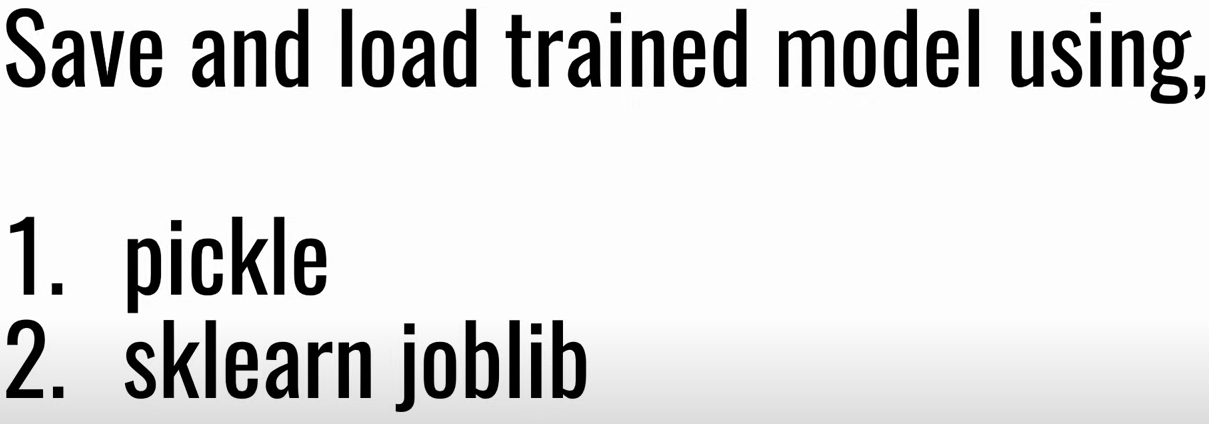

# Save and load trained model using
1. pickle
2. sklearn joblib

# Training a very big dataset

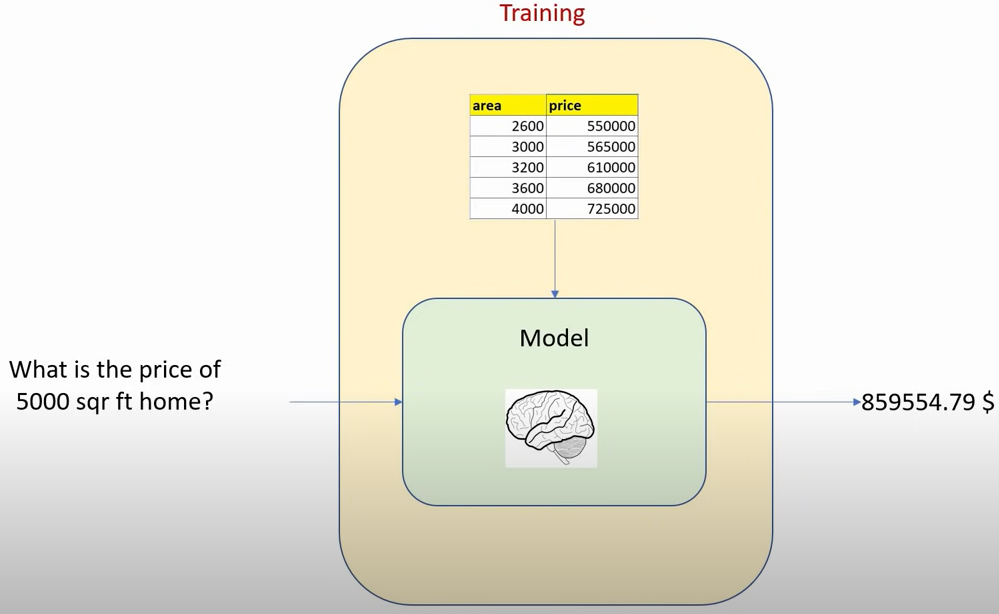

# Working with trained model dataset, so don't need to train it every time

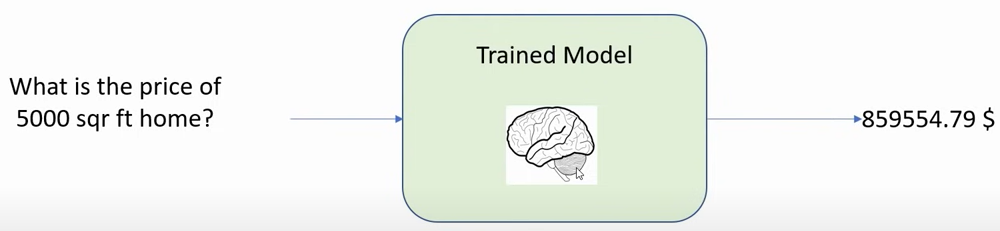

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

### create data frame by loading csv file using "pandas"

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# import io

# df = pd.read_csv(io.BytesIO(uploaded["homeprices.csv"]))
# df
url = "https://raw.githubusercontent.com/akdubey2k/ML/main/4_save_model_using_joblib_%26_pickle/homeprices.csv"
df = pd.read_csv(url)

### prepare and train the model

In [ ]:
model = linear_model.LinearRegression()
model.fit(df[['area']], df.price) # independent variable, dependent variable

LinearRegression()

### predict the value from trained model

In [ ]:
model.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [ ]:
model.coef_

array([135.78767123])

In [ ]:
model.intercept_

180616.43835616432

### Using linear regression to predict the house price
dependent variable = slope/coefficient * dependent variable + intercept<br>
**y = m * x + b**

In [ ]:
135.78767123 * 5000 + 180616.43835616432

859554.7945061643

In [ ]:
model.score(df[['area']], df['price'])

0.9584301138199486

## Let's use Pickle, to Save Model To a File Using Python Pickle.
**Pickle** is a module in Python used for **_serializing and de-serializing_** Python objects. This converts Python objects like **lists, dictionaries, etc. into byte streams (zeroes and ones).** You can convert the byte streams back into Python objects through a process called **unpickling.**

The **pickle module** implements **binary protocols** for **_serializing and de-serializing_** a Python object structure. **“Pickling”** is the process whereby a <u>_Python object hierarchy is converted into a byte stream,_</u> and **“unpickling”** is the <u>_inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy._</u> **Pickling (and unpickling)** is alternatively known as **“serialization”, “marshalling,” or “flattening”;** however, to avoid confusion, the terms used here are **“pickling” and “unpickling”.**

In [ ]:
import pickle

In [ ]:
with open('pickle_model','wb') as file:
    pickle.dump(model,file) # source, destination

## Now, Load the Saved Model using Pickle

In [ ]:
with open('pickle_model','rb') as file:
    p_model = pickle.load(file)

In [ ]:
p_model.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [ ]:
p_model.coef_

array([135.78767123])

In [ ]:
p_model.intercept_

180616.43835616432

In [ ]:
p_model.score(df[['area']],df.price)

0.9584301138199486

## Save Trained Model Using joblib

it may be better to use **joblib’s** replacement of **_pickle (dump & load),_** which is more efficient on objects that carry **large numpy arrays** internally as is often the case for fitted __scikit-learn__ estimators,

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'model_joblib') # source, destination

['model_joblib']

## Load the Saved Model using joblib

In [ ]:
j_model = joblib.load('model_joblib')

In [ ]:
j_model.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [ ]:
j_model.intercept_

180616.43835616432

In [ ]:
j_model.coef_

array([135.78767123])

In [ ]:
j_model.score(df[['area']],df.price)

0.9584301138199486